In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
import random
import shutil

In [26]:
batch_size = 32
img_height = 120
img_width = 120
path = '/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/data'

train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1093 files belonging to 4 classes.
Using 875 files for training.


In [27]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1093 files belonging to 4 classes.
Using 218 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['broken', 'closed_seal_broken', 'closed_sealed', 'open_broken']


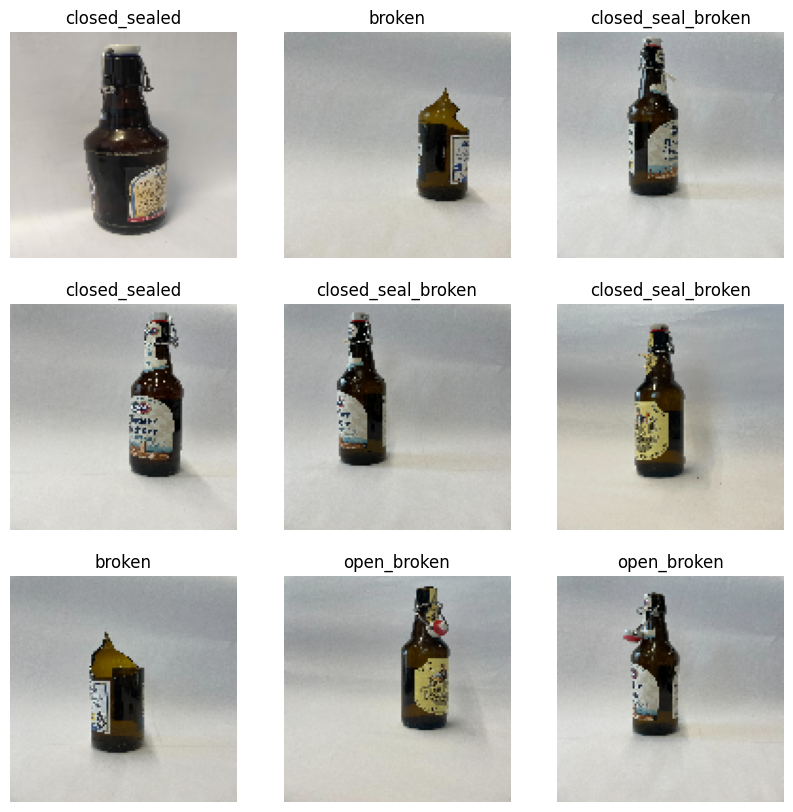

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [30]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [31]:
from tensorflow import keras
from keras import layers
num_classes = len(class_names)

model = keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 120, 120, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 120, 120, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 30, 30, 64)       

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
28/28 [==============================] - 11s 120ms/step - loss: 1.4758 - accuracy: 0.2606 - val_loss: 1.3693 - val_accuracy: 0.5000
Epoch 2/20
28/28 [==============================] - 1s 47ms/step - loss: 1.2923 - accuracy: 0.4229 - val_loss: 1.1035 - val_accuracy: 0.5688
Epoch 3/20
28/28 [==============================] - 2s 55ms/step - loss: 0.9068 - accuracy: 0.6114 - val_loss: 0.8057 - val_accuracy: 0.6514
Epoch 4/20
28/28 [==============================] - 1s 50ms/step - loss: 0.6703 - accuracy: 0.7109 - val_loss: 0.6521 - val_accuracy: 0.7523
Epoch 5/20
28/28 [==============================] - 1s 45ms/step - loss: 0.5521 - accuracy: 0.7760 - val_loss: 0.5835 - val_accuracy: 0.7706
Epoch 6/20
28/28 [==============================] - 1s 46ms/step - loss: 0.4524 - accuracy: 0.8286 - val_loss: 0.5589 - val_accuracy: 0.7661
Epoch 7/20
28/28 [==============================] - 1s 46ms/step - loss: 0.3835 - accuracy: 0.8526 - val_loss: 0.4894 - val_accuracy: 0.8211
Epoch 8/20


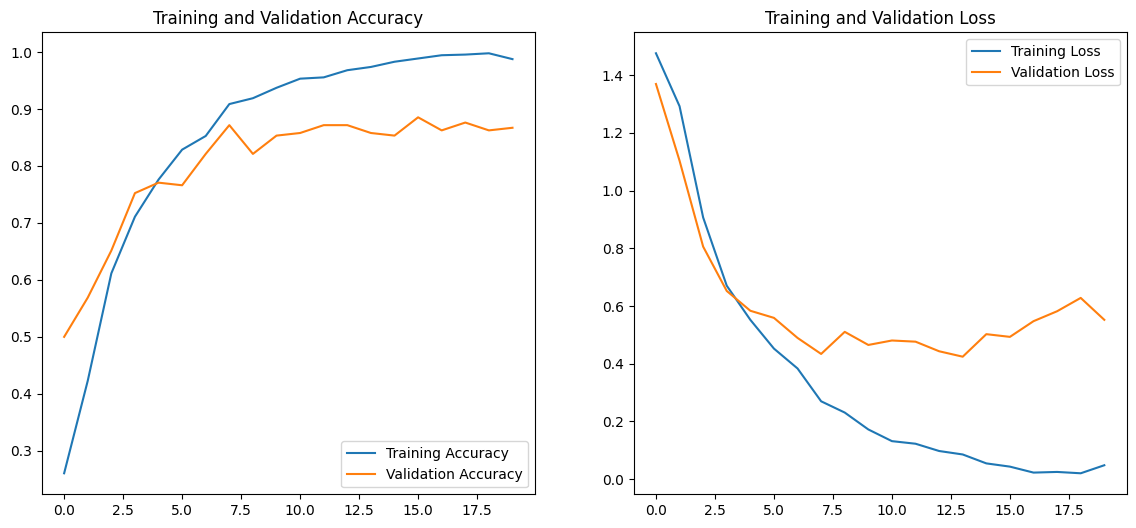

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [40]:
path_test = "/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/closed_seal_broken.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', 'file://'+path_test)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 21ms/step
This image most likely belongs to open_broken with a 100.00 percent confidence.
